In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/siim-medical-images/full_archive.npz
/kaggle/input/siim-medical-images/overview.csv
/kaggle/input/siim-medical-images/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0019_AGE_0070_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0063_AGE_0073_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0077_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0073_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0060_AGE_0080_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0051_AGE_0063_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0091_AGE_0072_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0076_AGE_0068_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0055_AGE_0071_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images

In [2]:
pip install dicom

     |████████████████████████████████| 766 kB 870 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
IS_LOCAL = True
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

if(IS_LOCAL):
    import pydicom as dicom
else:
    import dicom
    
import os

In [4]:
if(IS_LOCAL):
    PATH="../input/siim-medical-images/"
else:
    PATH="../input/"
print(os.listdir(PATH))

['dicom_dir', 'full_archive.npz', 'tiff_images', 'overview.csv']


In [5]:
data_df = pd.read_csv(os.path.join(PATH,"overview.csv"))

In [6]:
print("CT Medical images -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

CT Medical images -  rows: 100  columns: 8


In [7]:
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [8]:
print("Number of TIFF images:", len(os.listdir(os.path.join(PATH,"tiff_images"))))

Number of TIFF images: 100


In [9]:
tiff_data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+'tiff_images/*.tif')])

In [10]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [11]:
tiff_data = process_data('tiff_images/*.tif')

In [12]:
tiff_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,../input/siim-medical-images/tiff_images/ID_00...,ID_0027_AGE_0064_CONTRAST_1_CT.tif,0027,64,True,CT
1,../input/siim-medical-images/tiff_images/ID_00...,ID_0096_AGE_0083_CONTRAST_0_CT.tif,0096,83,False,CT
2,../input/siim-medical-images/tiff_images/ID_00...,ID_0073_AGE_0074_CONTRAST_0_CT.tif,0073,74,False,CT
3,../input/siim-medical-images/tiff_images/ID_00...,ID_0046_AGE_0072_CONTRAST_1_CT.tif,0046,72,True,CT
4,../input/siim-medical-images/tiff_images/ID_00...,ID_0052_AGE_0072_CONTRAST_0_CT.tif,0052,72,False,CT
5,../input/siim-medical-images/tiff_images/ID_00...,ID_0015_AGE_0061_CONTRAST_1_CT.tif,0015,61,True,CT
6,../input/siim-medical-images/tiff_images/ID_00...,ID_0009_AGE_0048_CONTRAST_1_CT.tif,0009,48,True,CT
7,../input/siim-medical-images/tiff_images/ID_00...,ID_0048_AGE_0077_CONTRAST_1_CT.tif,0048,77,True,CT
8,../input/siim-medical-images/tiff_images/ID_00...,ID_0020_AGE_0066_CONTRAST_1_CT.tif,0020,66,True,CT
9,../input/siim-medical-images/tiff_images/ID_00...,ID_0055_AGE_0071_CONTRAST_0_CT.tif,0055,71,False,CT


In [13]:
print("Number of DICOM files:", len(os.listdir(PATH+"dicom_dir")))

Number of DICOM files: 100


In [14]:
dicom_data = process_data('dicom_dir/*.dcm')

In [15]:
dicom_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,../input/siim-medical-images/dicom_dir/ID_0015...,ID_0015_AGE_0061_CONTRAST_1_CT.dcm,0015,61,True,CT
1,../input/siim-medical-images/dicom_dir/ID_0019...,ID_0019_AGE_0070_CONTRAST_1_CT.dcm,0019,70,True,CT
2,../input/siim-medical-images/dicom_dir/ID_0063...,ID_0063_AGE_0073_CONTRAST_0_CT.dcm,0063,73,False,CT
3,../input/siim-medical-images/dicom_dir/ID_0077...,ID_0077_AGE_0074_CONTRAST_0_CT.dcm,0077,74,False,CT
4,../input/siim-medical-images/dicom_dir/ID_0073...,ID_0073_AGE_0074_CONTRAST_0_CT.dcm,0073,74,False,CT
5,../input/siim-medical-images/dicom_dir/ID_0060...,ID_0060_AGE_0080_CONTRAST_0_CT.dcm,0060,80,False,CT
6,../input/siim-medical-images/dicom_dir/ID_0051...,ID_0051_AGE_0063_CONTRAST_0_CT.dcm,0051,63,False,CT
7,../input/siim-medical-images/dicom_dir/ID_0091...,ID_0091_AGE_0072_CONTRAST_0_CT.dcm,0091,72,False,CT
8,../input/siim-medical-images/dicom_dir/ID_0004...,ID_0004_AGE_0056_CONTRAST_1_CT.dcm,0004,56,True,CT
9,../input/siim-medical-images/dicom_dir/ID_0076...,ID_0076_AGE_0068_CONTRAST_0_CT.dcm,0076,68,False,CT


In [16]:
def countplot_comparison(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 4))
    s1 = sns.countplot(data_df[feature], ax=ax1)
    s1.set_title("Overview data")
    s2 = sns.countplot(tiff_data[feature], ax=ax2)
    s2.set_title("Tiff files data")
    s3 = sns.countplot(dicom_data[feature], ax=ax3)
    s3.set_title("Dicom files data")
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


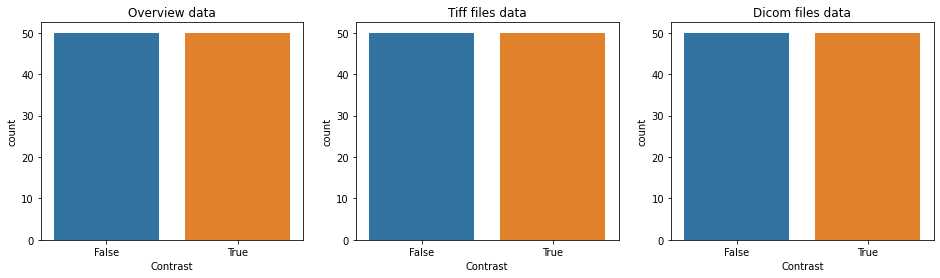

In [17]:
countplot_comparison('Contrast')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


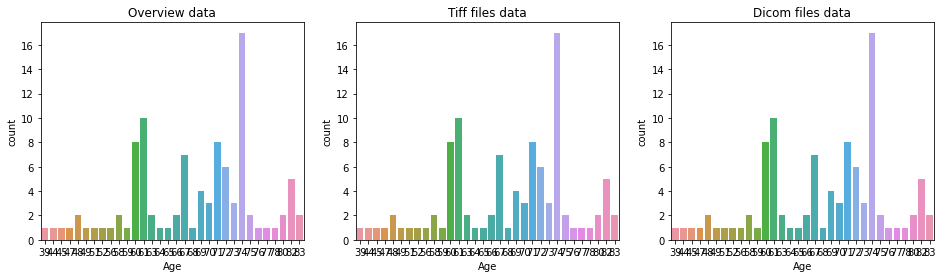

In [18]:
countplot_comparison('Age')

In [19]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='TIFF'): 
            data_row_img = imread(data_row['path'])
        elif(imtype=='DICOM'):
            data_row_img = dicom.read_file(data_row['path'])
        if(imtype=='TIFF'):
            ax[i//4, i%4].matshow(data_row_img,cmap='gray')
        elif(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

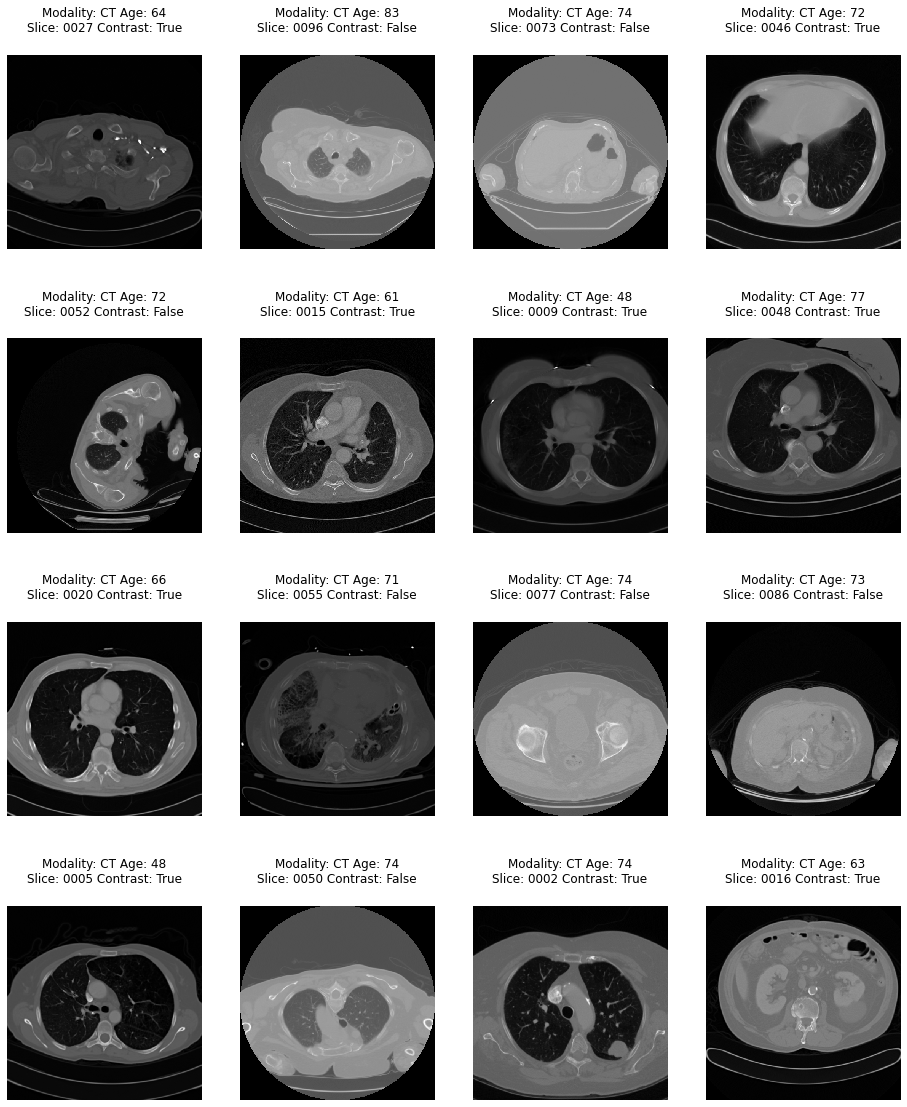

In [20]:
show_images(tiff_data,16,'TIFF')

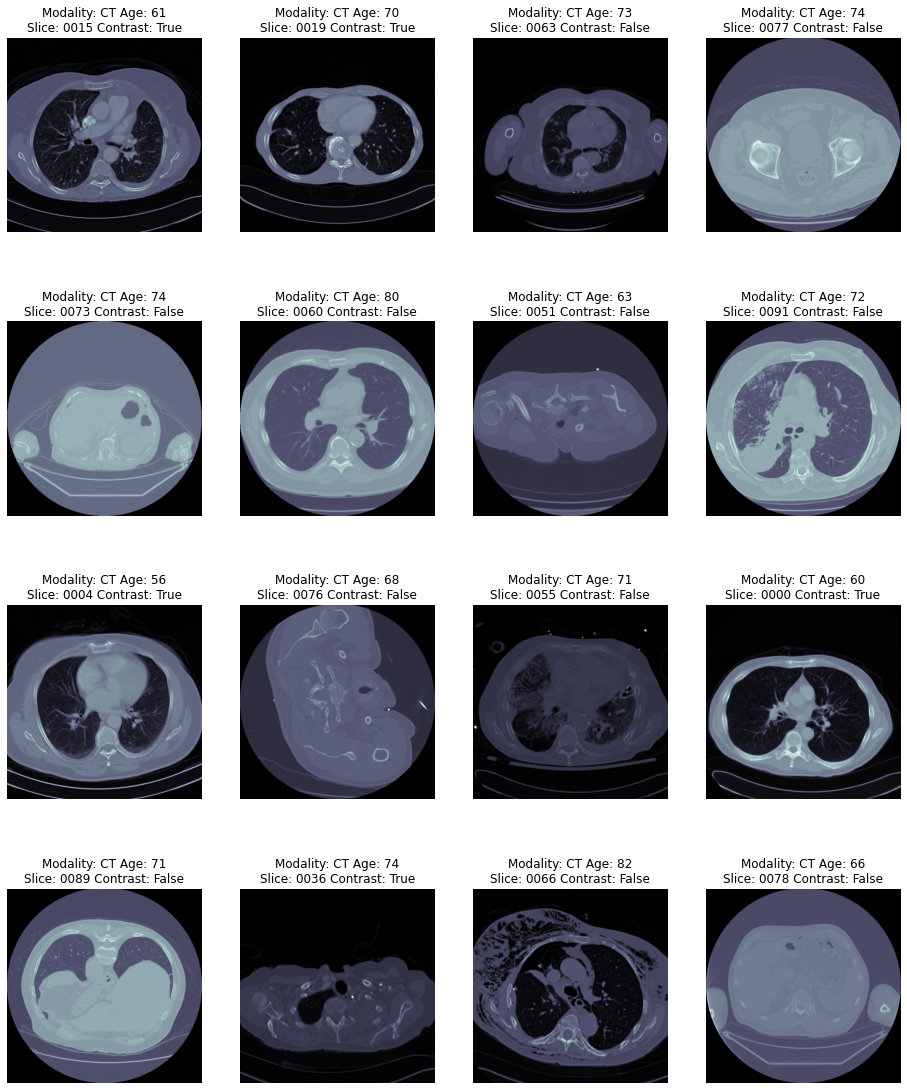

In [21]:
show_images(dicom_data,16,'DICOM')

In [22]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.612696157451530634003461974920
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 458
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1

In [23]:
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex: {}\nPatient Name: {}\nPatient ID: {}".format(
    dicom_file_dataset.Modality, 
    dicom_file_dataset.Manufacturer,
    dicom_file_dataset.PatientAge,
    dicom_file_dataset.PatientSex,
    dicom_file_dataset.PatientName,
    dicom_file_dataset.PatientID))

Modality: CT
Manufacturer: SIEMENS
Patient Age: 061Y
Patient Sex: F
Patient Name: TCGA-17-Z043
Patient ID: TCGA-17-Z043


In [24]:
def show_dicom_images(data):
    img_data = list(data[:16].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):

        data_row_img = dicom.read_file(data_row['path'])
        modality = data_row_img.Modality
        age = data_row_img.PatientAge
        
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
         modality, age, data_row['ID'], data_row['Contrast']))
    plt.show()

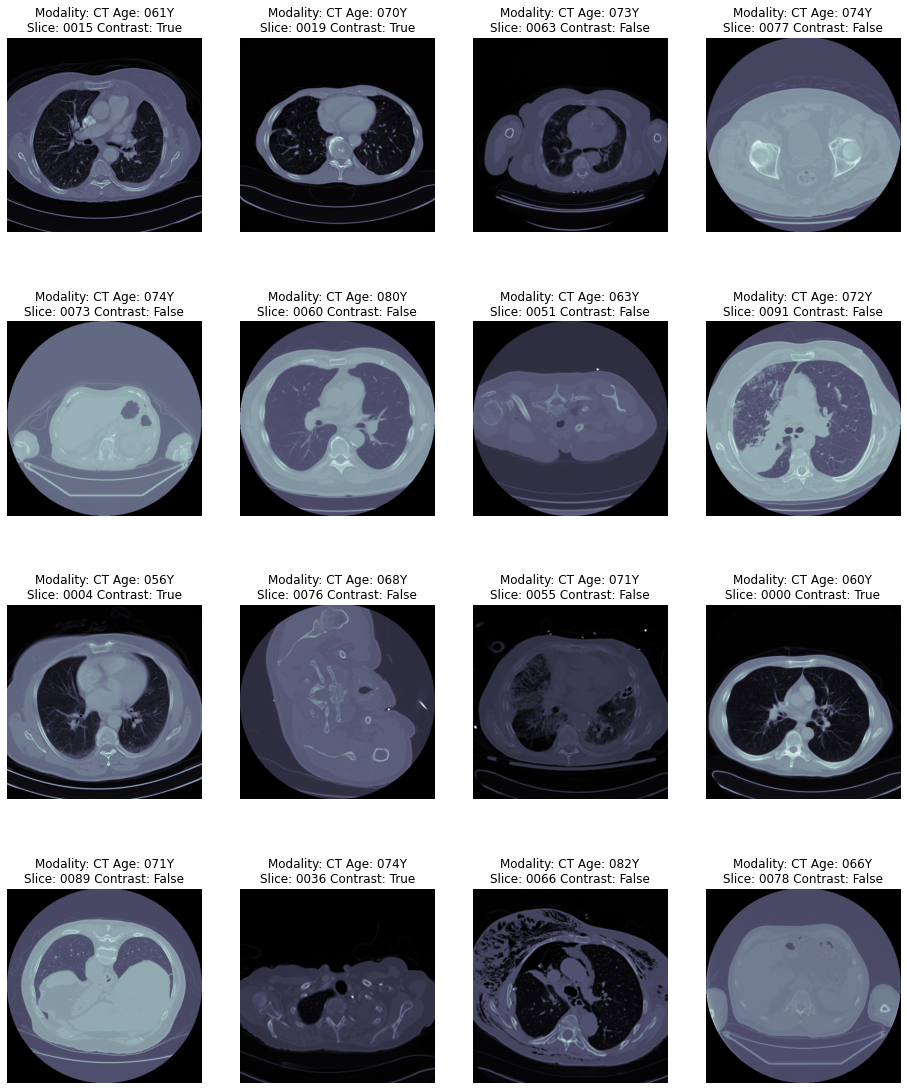

In [25]:
show_dicom_images(dicom_data)

In [26]:
data_df.columns = ['idx']+list(data_df.columns[1:])
data_df['Contrast'] = data_df['Contrast'].map(lambda x: 'Contrast' if x else 'No Contrast')
data_df.sample(3)

,idx,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
45,45,74,Contrast,NONE,../data/50_50_dicom_cases\Contrast\00001 (50).dcm,45,ID_0045_AGE_0074_CONTRAST_1_CT.tif,ID_0045_AGE_0074_CONTRAST_1_CT.dcm
38,38,71,Contrast,NONE,../data/50_50_dicom_cases\Contrast\00001 (44).dcm,38,ID_0038_AGE_0071_CONTRAST_1_CT.tif,ID_0038_AGE_0071_CONTRAST_1_CT.dcm
83,83,82,No Contrast,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,83,ID_0083_AGE_0082_CONTRAST_0_CT.tif,ID_0083_AGE_0082_CONTRAST_0_CT.dcm


<AxesSubplot:>

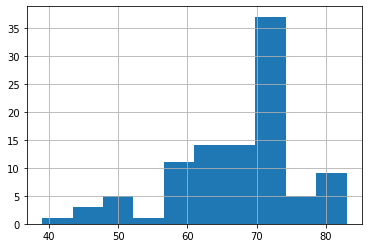

In [27]:
data_df['Age'].hist()

In [28]:
with np.load('../input/siim-medical-images/full_archive.npz', allow_pickle = True) as im_data:
    full_image_dict = dict(zip(im_data['idx'], im_data['image']))

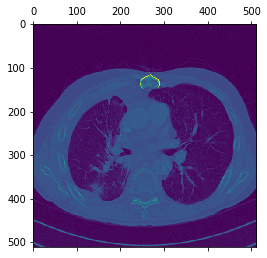

In [29]:
plt.matshow(full_image_dict[0])

In [30]:
data_df['MeanHU'] = data_df['idx'].map(lambda x: np.mean(full_image_dict.get(x, np.zeros((512,512)))))
data_df['StdHU'] = data_df['idx'].map(lambda x: np.std(full_image_dict.get(x, np.zeros((512,512)))))
data_df.sample(3)

,idx,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name,MeanHU,StdHU
26,26,70,Contrast,NONE,../data/50_50_dicom_cases\Contrast\00001 (33).dcm,26,ID_0026_AGE_0070_CONTRAST_1_CT.tif,ID_0026_AGE_0070_CONTRAST_1_CT.dcm,-441.045174,524.716757
74,74,74,No Contrast,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,74,ID_0074_AGE_0074_CONTRAST_0_CT.tif,ID_0074_AGE_0074_CONTRAST_0_CT.dcm,-464.048973,487.298433
25,25,74,Contrast,NaN,../data/50_50_dicom_cases\Contrast\00001 (32).dcm,25,ID_0025_AGE_0074_CONTRAST_1_CT.tif,ID_0025_AGE_0074_CONTRAST_1_CT.dcm,-493.397388,479.895108


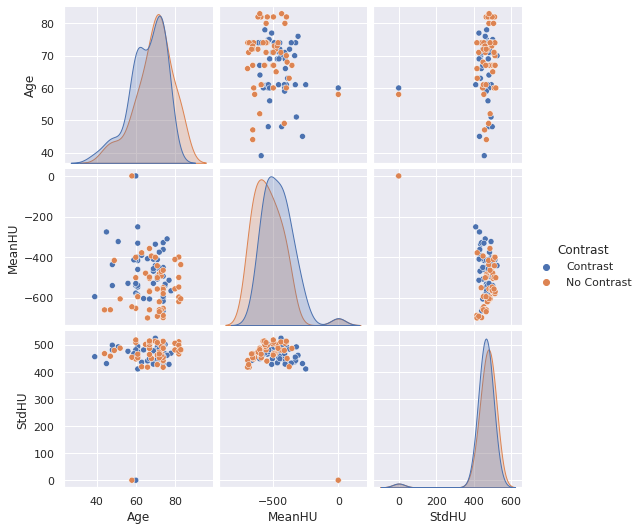

In [31]:
sns.set()
sns.pairplot(data_df[['Age', 'Contrast', 'MeanHU', 'StdHU']], hue="Contrast")